In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install yfinance
import yfinance as yf
from scipy.stats import norm

In [ ]:
acoes = ["SPXI11.SA", "BOVV11.SA", "VALE3.SA", "WEGE3.SA"]
carteira = pd.DataFrame()
for i in acoes:
  carteira[i] = yf.download(i, period='3y')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
"pesos = np.array([0.25, 0.25, 0.25, 0.25])"
valor = 1000000
retorno = carteira.pct_change()
posicao = valor * pesos
desv = retorno.std()
med = retorno.mean()
cov_matrix = retorno.cov()

In [ ]:
port_mean = med @ pesos
port_std = np.sqrt(pesos.T @ cov_matrix @ pesos)

In [ ]:
x = np.arange(-0.05, 0.055, 0.001)
norm_dist = norm.pdf(x ,port_mean, port_std)

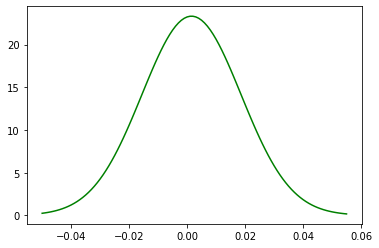

In [ ]:
plt.plot(x, norm_dist, color="g")
plt.show()

In [ ]:
confidence_level = 0.05
Var = norm.ppf(confidence_level, port_mean, port_std)
Var

-0.026611734890888857

In [ ]:
N = 100
VaR_N = Var * np.sqrt(N)
VaR_N

-0.26611734890888855

In [ ]:
queda_no_port = VaR_N * valor
round(queda_no_port,2)

-266117.35